In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
LFE_df = pd.read_csv('../data/calculated/lfe_detections_unet.csv', parse_dates=['start','end'])

LFE_duration=LFE_df['end']-LFE_df['start']  #want this in minutes and to be smart about day/year boundaries
LFE_secs=[]

In [3]:
def Delta_t_LFEs(LFE_df, LFE_secs, LFE_duration, unet=True):
    
    time_diff_df=pd.DataFrame({'st':LFE_df['start'][1:].values, 'en':LFE_df['end'][:-1].values})
    time_diff_minutes=time_diff_df.st-time_diff_df.en
    time_diff_minutes = [time_diff_minute.total_seconds()/60. for time_diff_minute in time_diff_minutes]
       
    fig, ax = plt.subplots(1, tight_layout=True, sharey = True, figsize=(8,8))
    #ax.hist(time_diff_minutes,bins=100,range=(0,300))
    n,bins,patches=ax.hist(time_diff_minutes,bins=30,range=(0,300))
    #, label=f"N = {len(time_diff_minutes)}")
    #, label=f"N = {len(time_diff_minutes)}" #bins are 10 minutes wide
    # ax.hist(np.array(LFE_secs)/(60.*60.),bins=np.linspace(0,250,126), label=f"N = {len(LFE_secs)}")
   
    #print("bins","patches","n")
    #print(bins[0],n[0])#how to find the indices of where these deltat<10 minutes are?
    if unet:
        ax.set_title(r'Histogram of LFE $\Delta$T (ODwyer et al., 2023 list)')
    else:
        ax.set_title('Histogram of LFE deltaT across Cassini mission (Training Data)')

    ax.set_xlabel('$\Delta$T between successive LFEs (minutes)',fontsize=20)
    ax.set_ylabel('# of LFEs',fontsize=20)
    ax.set_xlim([0,300])

    median = np.median(np.array(time_diff_minutes))    #values from sec to hours
    mean = np.mean(np.array(time_diff_minutes))     #values from sec to hours
    minimum = np.min(np.array(time_diff_minutes))    #values from sec to hours
    maximum = np.max(np.array(time_diff_minutes))     #values from sec to hours
    
    #print('FUNCTION CALCULATIONS OF MEAN AND MEDIAN')
    print('median of deltaT is: ')
    print(median)
    print('mean of deltaT is: ')
    print(mean)
    print('min of deltaT is: ')
    print(minimum)
    print('max of deltaT is: ')
    print(maximum)
    

    ax.axvline(x=10000, color="blue", linewidth=2, label=f"N = {len(time_diff_minutes)}")
    ax.axvline(x=median, color="indianred", linewidth=2, label=f"Median: {median:.2f} hours")
    ax.axvline(x=mean, color="indianred", linewidth=2, linestyle="dashed", label=f"Mean: {mean:.2f} hours")
    #ax.axvline(x=12.0, color="indianred", linewidth=2, linestyle="dotted", label=f"Long cutoff: 11 hours")

    plt.legend()

    plt.show()
  
  
    #If we have lots of delta_T that are about 30 minutes or less, consider a simple manual joining 
    #Thus make a new LFE_df_joined with (most) of the same parameters as LFE_df (start, end, duration, xyz). No label or probability as these will change
    #Then return this LFE_df_joined back to main so it can be called for the PPOs, duration histogram etc. etc.
    #For this need to be able to plot a spectrogram and show how the joining has been conducted
    #Search Elizabeth code on GitHub and my 2023PRE paper code for spectrogram plotting
    #Python_code/Cassini_plotting_main/Plot_spectrogram works! [haven't tried the polygons over it yet]
    
    return (time_diff_df,time_diff_minutes)

<>:21: SyntaxWarning: invalid escape sequence '\D'
<>:21: SyntaxWarning: invalid escape sequence '\D'
/var/folders/j9/q8hqts053r57j7y11x4bv2_c0000gn/T/ipykernel_60782/2927427220.py:21: SyntaxWarning: invalid escape sequence '\D'
  ax.set_xlabel('$\Delta$T between successive LFEs (minutes)',fontsize=20)


median of deltaT is: 
318.0
mean of deltaT is: 
997.8714268623025
min of deltaT is: 
-504.0
max of deltaT is: 
37283.98333333333


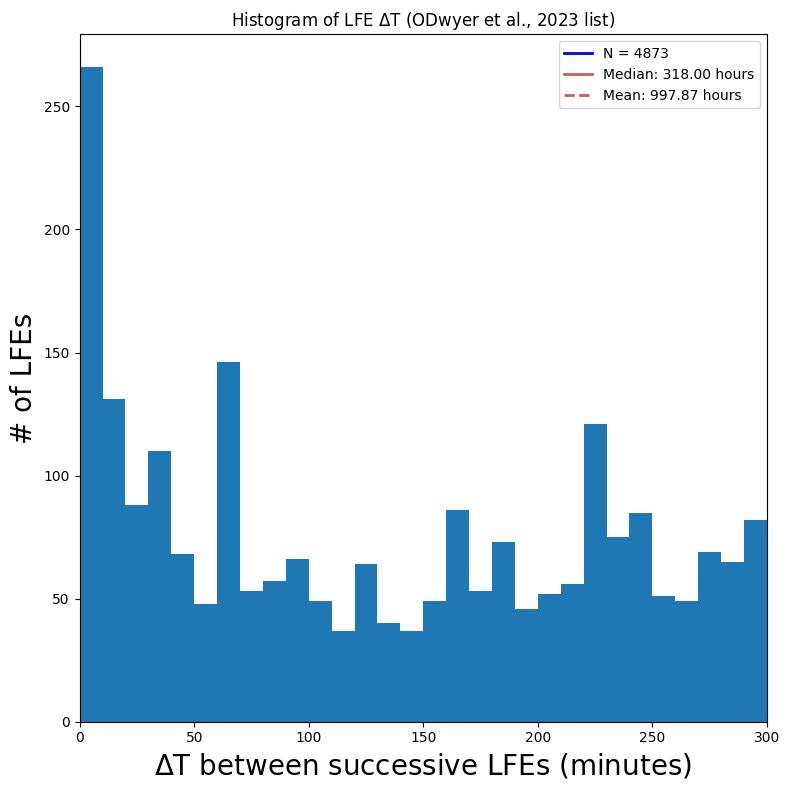

(                      st                  en
 0    2004-01-02 05:06:00 2004-01-01 16:03:00
 1    2004-01-02 21:42:00 2004-01-02 10:42:00
 2    2004-01-03 23:39:00 2004-01-03 03:03:00
 3    2004-01-04 01:39:00 2004-01-04 01:18:00
 4    2004-01-04 18:21:00 2004-01-04 08:09:00
 ...                  ...                 ...
 4868 2017-09-11 02:27:00 2017-09-11 01:24:00
 4869 2017-09-11 04:24:00 2017-09-11 04:06:00
 4870 2017-09-11 10:36:00 2017-09-11 10:24:00
 4871 2017-09-11 16:51:00 2017-09-11 15:03:00
 4872 2017-09-14 04:15:00 2017-09-11 18:42:00
 
 [4873 rows x 2 columns],
 [783.0,
  660.0,
  1236.0,
  21.0,
  612.0,
  285.0,
  825.0,
  477.0,
  1788.0,
  9.0,
  21.0,
  714.0,
  339.0,
  237.0,
  387.0,
  450.0,
  1029.0,
  45.0,
  327.0,
  798.0,
  339.0,
  645.0,
  438.0,
  399.0,
  984.0,
  9.0,
  6.0,
  408.0,
  57.0,
  1161.0,
  486.0,
  483.0,
  399.0,
  507.0,
  18.0,
  291.0,
  12294.0,
  93.0,
  6.0,
  48.0,
  186.0,
  33.0,
  1062.0,
  939.0,
  684.0,
  510.0,
  1548.0,
  6.0

In [4]:
Delta_t_LFEs(LFE_df, LFE_secs, LFE_duration)